## WNTR test installation
## Imports

In [1]:
# show package version
import wntr
print("WNTR version:", wntr.__version__)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\wntr\epanet\toolkit.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


WNTR version: 1.3.2


## Units
WNTR uses SI (International System) units (length in meters, time in seconds, mass in kilograms).  See https://usepa.github.io/WNTR/units.html for more details.

# Water Network Model

The `WaterNetworkModel` object defines the water distribution system and simulation options. The object can be created from an EPANET INP file.

In [2]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('networks/Net1.inp')

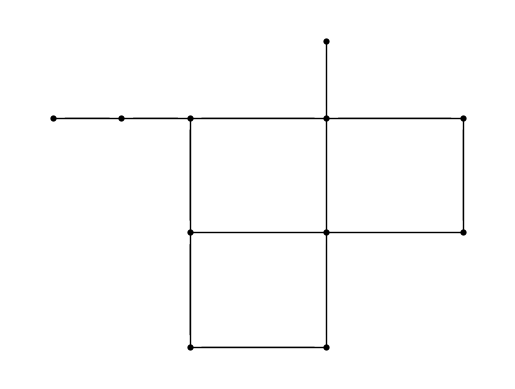

In [3]:
# Plot a basic network graphic
ax = wntr.graphics.plot_network(wn)

## Run hydraulic simulation and get results

In [ ]:
# Simulate hydraulics using EPANET
sim = wntr.sim.EpanetSimulator(wn)
results_EPANET = sim.run_sim()

In [ ]:
# View EpanetSimulator pressure results
results_EPANET.node['pressure'].head()

In [ ]:
# Plot demand timeseries of a given node
node_pressure = results_EPANET.node['demand'].loc[:,'32']
ax = node_pressure.plot(title='Node demand')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Demand (m$^3$/s)')

In [ ]:
# Plot pressure head timeseries of a given node
node_pressure = results_EPANET.node['pressure'].loc[:,'32']
ax = node_pressure.plot(title='Node pressure')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pressure (m)')

In [ ]:
# Plot timeseries of tank levels
tank_levels = results_EPANET.node['pressure'].loc[:,wn.tank_name_list]
ax = tank_levels.plot(title='Tank level')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Tank Level (m)')

In [ ]:
# Plot timeseries of pump flowrates
pump_flowrates = results_EPANET.link['flowrate'].loc[:,wn.pump_name_list]
ax = pump_flowrates.plot(title='Pump flowrate')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pump flowrate (m$^3$/s)')

In [ ]:
# Plot pressure at hour 5 on the network
pressure_at_5hr = results_EPANET.node['pressure'].loc[5*3600, :]
ax = wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=30, title='Pressure at 5 hours')